# Ship Damage Probability
Should I roll the dice? This notebook introduces the probabilities that will help Seafall players make that decision.

In [81]:
%matplotlib inline

import itertools
import matplotlib
import matplotlib.pyplot
import numpy
import os
import pandas
import scipy.misc
import scipy.special
import seaborn

In [82]:
# colormap for data visualizations
cmap = seaborn.cubehelix_palette(n_colors = 20, start = 0.8, rot = 0.75,
                                gamma = 0.3, hue = 2.0, dark = 0.005,
                                light = 0.95, reverse = True, as_cmap = True)

## A cursed throw during the prologue
I went to explore a region on the first island with my flagship being supported by the second ship in my fleet. With the Woodsman as my advisor I would have 4 dice to roll where I needed 3 successes to avoid damage to my ship. I cast my dice and grimaced after they settled on 3 blanks and merely 1 success. I felt unlucky (even though my endeavor was ultimately successful). Was I cursed?

## Counting the outcomes of dice rolls
Dice rolls can be [framed](http://math.stackexchange.com/questions/900672/how-many-combinations-from-rolling-5-identical-dice) as [stars and bars](http://math.stackexchange.com/questions/208377/combination-with-repetitions) problems. This is a clever way to frame the combinatorics of dice rolling. The combination formula is used to choose the location of the bars, whose position determines how many dice show a particular face. The stars between the bars represent the number of dice showing a particular face; the identity of that face is determined by how many bars are to the right (or left) of the star(s). If two bars are adjacent that means there aren't any dice showing the particular face defined by the position between those bars.

\begin{equation}\text{unique dice combinations} = \binom{n - 1 + k}{n - 1}\end{equation}

\begin{equation}n = \text{the number of faces on a die}\end{equation}

\begin{equation}k = \text{the size of the dice pool}\end{equation}

*Note that all dice in the pool must be identical. Unless otherwise stated, it is assumed that the dice pool consists of identical dice.*

### The combination formula is essential
The combination formula will again prove useful for counting outcomes when considering only two possibilities. In Seafall, often it only matters whether the face of a die is blank or not. In these cases, the combination formula can be used to count the outcomes by enumerating the ways a pool of dice can be divided into two sets. From a given dice pool choose a given number of dice to be part of the *blank* set; since there are only two sets this means the remaining dice are part of the *success* set.

\begin{equation}\text{unique dice combinations} = \binom{n}{k}\end{equation}

\begin{equation}n = \text{the size of the dice pool}\end{equation}

\begin{equation}k = \text{the number of blanks}\end{equation}

Looking ahead, when there are more than two outcomes we'll need the multinomial coefficient formula, which reduces to the combination formula when there is only two outcomes. The multinomial formula comes into play during more complex situations encountered in Seafall. For the most common encounters on the high seas we'll be using [combinations](https://en.wikipedia.org/wiki/Combination) to do the heavy lifting for our calculations.

### Rolling an example
Consider the scenario where 2, 6-sided dice are being rolled. Let's enumerate all of the possible outcomes:

1st die | 2nd die 
---: | ---:
1 | 1 
1 | 2 
1 | 3 
1 | 4 
1 | 5 
1 | 6 
2 | 1
2 | 2
2 | 3
2 | 4
2 | 5
2 | 6
3 | 1
3 | 2
3 | 3
3 | 4
3 | 5
3 | 6
4 | 1
4 | 2
4 | 3
4 | 4
4 | 5
4 | 6
5 | 1
5 | 2
5 | 3
5 | 4
5 | 5
5 | 6
6 | 1
6 | 2
6 | 3
6 | 4
6 | 5
6 | 6

***Phew!*** That's a long list.

After counting the rows we find there are 36 unique outcomes if we are keeping track of the identity of the 1st and 2nd die; 6-faces times 6-faces equals 36 pairs.

However, we often don't care about the identity of the dice that we roll, just their values. What if we ignore the identity of the dice and only count unique pairs? For example, given the pair (1,2) we'll want to throw out (2,1).

1st die | 2nd die 
---: | ---:
1 | 1 
1 | 2 
1 | 3 
1 | 4 
1 | 5 
1 | 6 
2 | 2
2 | 3
2 | 4
2 | 5
2 | 6
3 | 3
3 | 4
3 | 5
3 | 6
4 | 4
4 | 5
4 | 6
5 | 5
5 | 6
6 | 6

Now we only have 21 rows. This is the number that represents the number of unique outcomes from rolling 2 dice. The stars and bars equation is the formula for finding this number. Stars and bars is easiest to understand through an example. The key is to avoid enumeration, like we did above, and focus on how a group of dice can be distributed into groups that represent the faces on the dice. Consider the 2, 6-sided dice scenario again, but instead of 2 dice imagine we have 2 footballs and instead of 6 faces to a die we have 5 orange cones. We are going to place either a football or a cone along the sideline at every 1 yard hash mark. Let's graphically represent the 2 footballs and 5 cones on the football field:

yardline | 1 | 2 | 3 | 4 | 5 | 6 | 7  
--- | --- | --- | --- | --- | --- | --- | --- | ---
 | **football** | **football** | cone | cone | cone | cone | cone
 
The 5 cones divide our line into 6 groups. In the configuration above, the 2 footballs would be in the first group, because the footballs are placed before the first cone. As dice, this would be the same as rolling (1, 1). Reordering the footballs and cones along the hash marks corresponds to another roll of the dice. For example,

yardline | 1 | 2 | 3 | 4 | 5 | 6 | 7  
--- | --- | --- | --- | --- | --- | --- | --- | ---
 | cone | **football** | cone | cone | cone | cone | **football**
 
This configuration is like rolling (2, 6); the second group exists between the first cone and second cone and the sixth group is after the fifth cone. To enumerate all the configurations of the footballs and the cones we only have to consider where the 5 cones are placed along the hash marks. We don't have to keep track of the footballs, because the footballs are all the same and their location along the hash marks is dictated by the positions of the cones. Therefore, to find the total number of outcomes for rolling 2, 6-sided dice we can calculate where to place 5 cones along the first 7 hash marks of a football field. The combination equation will give the number we are interested in, 7 choose 5.

In [83]:
# FWIW, total number of unique outcomes from rolling 2, 6-sided dice.
# Note that stars-and-bars is also called combination with repition.
print("stars and bars", scipy.misc.comb(6, 2, repetition=True)) # scipy.misc.comb(# of faces, # of dice, repitition=True)
# combination: asks, "Given 5 orange cones, how many different ways are there to roll 2 blanks?"
print("combination", scipy.misc.comb(7,5))

stars and bars 21.0
combination 21.0


### Where are permutations?
The permutation equation is closely related to the combination equation, but we are not using it at all. Why? It is because we do not care about the order that we are rolling the dice when we are considering the outcome of a dice pool. If it mattered that we rolled a success before we rolled a blank, or vice versa, then the permutation equation would be appropriate. However, a success rolled before a blank or a blank rolled before a success will always add up to 1 success and 1 blank, so the combination formula is correct.

## Weighted dice
Since the possibilities of rolling a blank is weighted, i.e. the chance of rolling a blank does not equal the probability of *not* rolling a blank, counting the outcomes alone will not yield the correct probability. Each outcome for a given combination will however share the same probability, so it is only a matter of finding the probability for a single outcome and multiplying it by the total number of unique outcomes.

In [84]:
cursed_probability = (1.0/3)**3 * (2.0/3) * scipy.misc.comb(4,1) + (1.0/3)**4
print(cursed_probability)

0.111111111111


My roll (or worse) would only happen 11% of the time, so I would consider myself unlucky and stop short of calling myself cursed.

# A simulation
Before we explicitly calculate the probabilites for potential ship damage, simulating the dice rolls to sample the actual probability space is a useful sanity check we can refer to as we code-up the exact probabilities.

We will map a random number from a uniform distribution $\left[0, 1\right]$ to a piecewise function that reflects the probability of a given face resulting from a roll. When we only care about blanks and successes the 6 sides of the dice can be treated as a weighted coin instead. On one "side" of the coin is the blank result shown by 2 of the 6 faces, so it has a $1/3$ chance of happening. That's all we need to know, because any other result will be considered a success. The piecewise function will return a 1 if the random variable is  $<= 1/3$, and a 0 otherwise. The end result will be the total number of blanks found after rolling a dice pool.

In [85]:
p_blank = 1.0/3

def simulate_roll(total_dice):
    x = numpy.random.uniform(size=total_dice)
    conds = [x <= p_blank, (x > p_blank)]
    # each blank counts as 0, other successes count as 1
    roll_array = numpy.piecewise(x, conds, [0, 1])
    return numpy.sum(roll_array)

def success_roll_simulator(total_dice, n):
    sim_list = [simulate_roll(total_dice) for i in range(n)]
    return numpy.array(sim_list)
    #return {"num_success" : num_success_array, "p_success" : p_success_array}
    
n = 10000
success_count_list = [success_roll_simulator(i, n) for i in numpy.arange(1,16)]
for i, array in enumerate(success_count_list):
    array[array < 0] = 0
    success_count_list[i] = array
success_count_itemfreq = [scipy.stats.itemfreq(a) for a in success_count_list]

sdp_sim = numpy.zeros((15,16))
for i, array in enumerate(success_count_itemfreq):
    for j in array:
        sdp_sim[i, j[0].astype(int)] = j[1]/n
        
# for the greater than or equal probabilites, sum along the rows
sdp_sim_gte = numpy.zeros((15,15))

for (i, j), _ in numpy.ndenumerate(sdp_sim_gte):
    sdp_sim_gte[i, j] = numpy.sum(sdp_sim[i, j+1:])

row_blank = numpy.arange(1,16) # number of dice showing the blank face
col_dice = numpy.arange(1,16) # number of dice in the pool
sdp_sim_gte_dataframe = pandas.DataFrame(data = sdp_sim_gte, index = row_blank, columns = col_dice)
sdp_sim_gte_dataframe_stack = sdp_sim_gte_dataframe.stack().reset_index().rename(
    columns = {
        "level_0" : "number_success", 
        "level_1" : "number_dice_pool", 
        0 : "probability_GTE_to_number_success"})

sdp_sim_gte_pivot = sdp_sim_gte_dataframe_stack.pivot("number_success", 
                                                      "number_dice_pool", 
                                                      "probability_GTE_to_number_success")

sdp_sim_gte_mask = numpy.logical_or(sdp_sim_gte_pivot > 0.999, numpy.triu(numpy.ones((15,15)), 1))

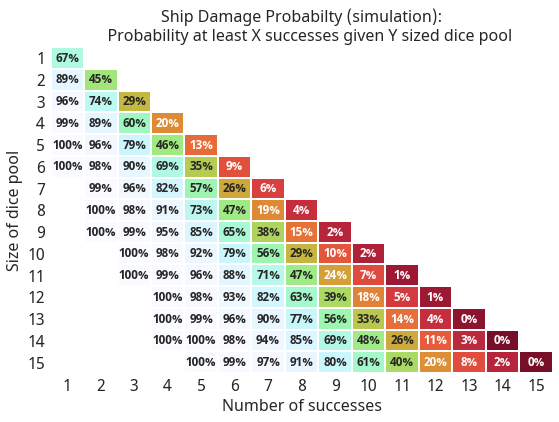

In [86]:
seaborn.set(style = "white")
seaborn.set_context("paper")
seaborn.set_style({'font.family': 'Noto Sans'})
matplotlib.pyplot.figure(figsize=(9, 6))
ax = seaborn.heatmap(sdp_sim_gte_pivot, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_sim_gte_mask, 
                     annot_kws = {"weight" : "bold", "fontsize" : 12},
                     fmt = ".0%", linewidths = 1, vmin=0.0, 
                     vmax=1.0, square=False)
ax.tick_params(labelsize=16)
ax.tick_params(axis='y', rotation=0)

ax.set_title(
    """Ship Damage Probabilty (simulation):
    Probability at least X successes given Y sized dice pool""", 
    fontsize=16)
ax.set_xlabel("Number of successes", fontsize=16)
ax.set_ylabel("Size of dice pool", fontsize=16)
fig = ax.get_figure()
fig.savefig(os.path.join("..", "stage1", "charts", "ship_damage_probabilities_1to15_simulation.pdf"))
fig.savefig(os.path.join("..", "stage1", "charts", "ship_damage_probabilities_1to15_simulation.svg"), format="svg", dpi=1200)

In [87]:
p_blank = 1.0/3

def prob_success(num_success, total_dice):
    if total_dice < num_success:
        p = 0.0
    else:
        p = (p_blank)**(total_dice-num_success) * \
        (1.0-p_blank)**num_success * \
        scipy.misc.comb(total_dice, num_success)
    return p

In [88]:
cursed_probability = prob_success(0,4) + prob_success(1,4)
print(cursed_probability)

0.111111111111


In [89]:
def prob_success_or_better(num_success, total_dice):
    if total_dice < num_success:
        p = 0.0
    else:
        rng_blank = numpy.arange(num_success, total_dice + 1)
        array_blank = [prob_success(n, total_dice) for n in rng_blank]
        p = numpy.sum(array_blank)
    return p

In [90]:
cursed_probability = 1 - prob_success_or_better(2,4)
print(cursed_probability)

0.111111111111


# Ship Damage Probability (SDP) matrix
There are 15 dice within Seafall, so a matrix should be large enough to assess the situation where all 15 are rolled. The early game does not use near this many dice, but eventually there is a island to discover at sea with a 30 defense! To cover all these situations several visualizations will be created.

In [91]:
row_success = numpy.arange(1,31) # number of dice showing the blank face
col_dice = numpy.arange(1,31) # number of dice in the pool
sdp = numpy.zeros((numpy.size(row_success),numpy.size(col_dice)))
prob = [prob_success_or_better(*i) for i in itertools.product(row_success, col_dice)]
ind = [tuple(numpy.subtract(i,1)) for i in itertools.product(row_success, col_dice)]
for idx, val in enumerate(ind):
    sdp[val] = prob[idx]

In [92]:
# http://stackoverflow.com/questions/41474284/how-to-convert-a-matrix-into-column-array-with-pandas-python
sdp_dataframe = pandas.DataFrame(data = sdp, index = row_success, columns = col_dice)
sdp_dataframe_stack = sdp_dataframe.stack().reset_index().rename(
    columns = {
    "level_0" : "number_successes", 
    "level_1" : "number_dice_pool", 
    0 : "probability_GTE_to_number_successes"}
)

sdp_dataframe_15 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_successes"] < 16) &
                                          (sdp_dataframe_stack["number_dice_pool"] < 16)]

sdp_pivot = sdp_dataframe_15.pivot("number_dice_pool", 
                                      "number_successes", 
                                      "probability_GTE_to_number_successes")
sdp_mask = numpy.logical_or(sdp_pivot > 0.999, numpy.triu(numpy.ones((15,15)), 1))

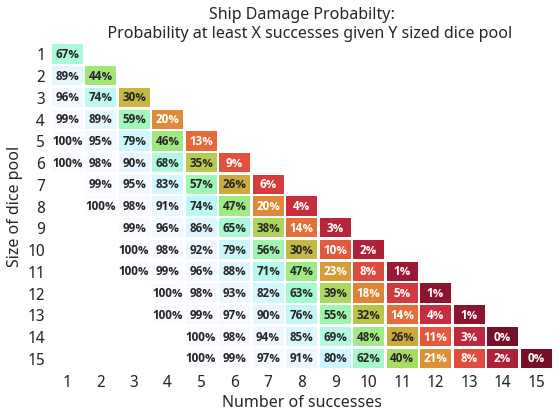

In [93]:
seaborn.set(style = "white")
seaborn.set_context("paper")
seaborn.set_style({'font.family': 'Noto Sans'})
matplotlib.pyplot.figure(figsize=(9, 6))
ax = seaborn.heatmap(sdp_pivot, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask, annot_kws = {"weight" : "bold", "fontsize" : 12},
                     fmt = ".0%", linewidths = 1.5, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    """Ship Damage Probabilty:
    Probability at least X successes given Y sized dice pool""",
    fontsize=16)

ax.tick_params(labelsize=16)
ax.tick_params(axis='y', rotation=0)

ax.set_xlabel("Number of successes", fontsize=16)
ax.set_ylabel("Size of dice pool", fontsize=16)
fig = ax.get_figure()
fig.savefig(os.path.join("..", "stage1", "charts", "ship_damage_probabilities_1to15.pdf"))
fig.savefig(os.path.join("..", "stage1", "charts", "ship_damage_probabilities_1to15.svg"), format="svg", dpi=1200)

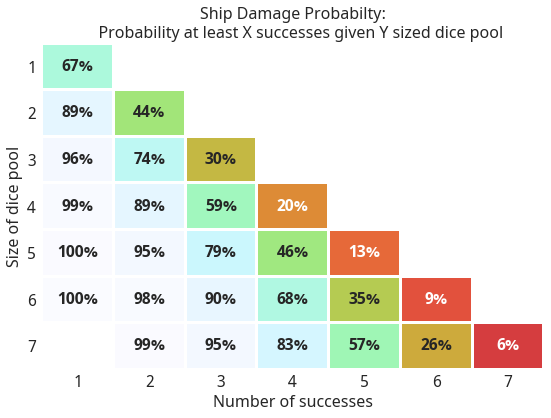

In [94]:
seaborn.set(style = "white")
seaborn.set_context("paper")
seaborn.set_style({'font.family': 'Noto Sans'})
matplotlib.pyplot.figure(figsize=(9, 6))
sdp_dataframe_7 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_successes"] < 8) &
                                          (sdp_dataframe_stack["number_dice_pool"] < 8)]

sdp_pivot_7 = sdp_dataframe_7.pivot("number_dice_pool", 
                                    "number_successes", 
                                    "probability_GTE_to_number_successes")

sdp_mask_7 = numpy.logical_or(sdp_pivot_7 > 0.999, numpy.triu(numpy.ones((7,7)), 1))

ax = seaborn.heatmap(sdp_pivot_7, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask_7, annot_kws = {"weight" : "bold", "fontsize" : 16},
                     fmt = ".0%", linewidths = 2.0, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    """Ship Damage Probabilty:
    Probability at least X successes given Y sized dice pool""",
    fontsize=16)
ax.tick_params(labelsize=16)
ax.tick_params(axis='y', rotation=0)
ax.set_xlabel("Number of successes", fontsize=16)
ax.set_ylabel("Size of dice pool", fontsize=16)
fig = ax.get_figure()
fig.savefig(os.path.join("..", "stage1", "charts","ship_damage_probabilities_1to7.pdf"))
fig.savefig(os.path.join("..", "stage1", "charts","ship_damage_probabilities_1to7.svg"), format="svg", dpi=1200)

# A daring raid upon my province
The end of the 2nd game was nigh. I ended my turn with 10 glory and was primed to secure a 2-glory treasure and victory in the next round. However, it was a close game. Mike and Joe both had 9 glory and Mike still had a turn to go in the current round. I had already claimed a 2-glory treasure earlier in the game, and Mike eyed my vault enviously; I had a target on my back. Unfortunately, my ships were both at sea, so my home port was undefended. Mike took advantage and attacked! He had 6 dice to roll and needed 5 successes to raid my treasure room; my next turn would never come. Here is how the numbers break down:

Look at row 6 and column 5. Mike had a 35% chance of 5 or more successes that he needed to plunder my treasure! I hope my luck changes soon. I tip my cap to his bold play.

Eventually, dice pools will exceed the number of dice provided, 15, in the game of SeaFall.

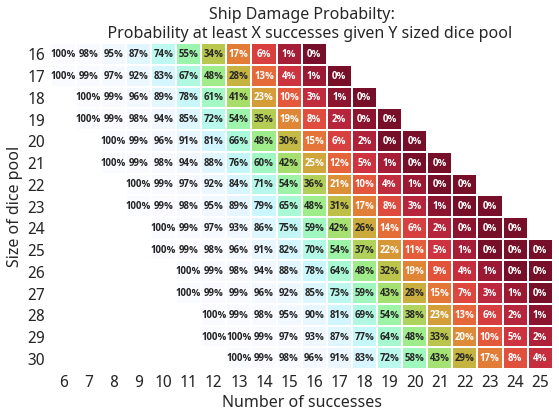

In [95]:
sdp_dataframe_30 = sdp_dataframe_stack.loc[(sdp_dataframe_stack["number_successes"] > 5) &
                                           (sdp_dataframe_stack["number_successes"] < 26) &
                                          (sdp_dataframe_stack["number_dice_pool"] > 15)]

sdp_pivot_30 = sdp_dataframe_30.pivot("number_dice_pool", 
                                    "number_successes", 
                                    "probability_GTE_to_number_successes")

sdp_mask_30 = numpy.logical_or(sdp_pivot_30 > 0.999, numpy.triu(numpy.ones((15,20)), 11))

seaborn.set(style = "white")
seaborn.set_context("paper")
seaborn.set_style({'font.family': 'Noto Sans'})
matplotlib.pyplot.figure(figsize=(9, 6))
ax = seaborn.heatmap(sdp_pivot_30, annot = True, cmap = cmap,
                     cbar = False, mask = sdp_mask_30, annot_kws = {"weight" : "bold", "fontsize" : 10},
                     fmt = ".0%", linewidths = 1, vmin=0.0, 
                     vmax=1.0)
ax.set_title(
    """Ship Damage Probabilty:
    Probability at least X successes given Y sized dice pool""",
    fontsize=16)
ax.tick_params(labelsize=16)
ax.tick_params(axis='y', rotation=0)
ax.set_xlabel("Number of successes", fontsize=16)
ax.set_ylabel("Size of dice pool", fontsize=16)
fig = ax.get_figure()
fig.savefig(os.path.join("..", "stage1", "charts", "ship_damage_probabilities_16to30.pdf"))
fig.savefig(os.path.join("..", "stage1", "charts", "ship_damage_probabilities_16to30.svg"), format="svg", dpi=1200)